In [1]:
from pymonntorch import *
from matplotlib import pyplot as plt
import numpy as np
from timeRes import TimeResolution
from current import *
from lif import LIF
from synapse import *
from connections import Connections

In [2]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
ng1 = NeuronGroup(
    100,
    net=net,
    behavior={
        2: NoisyConstantCurrent(value=55),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-65,
            threshold=-35,
            R=1,
            N=10,
        ),
        9: Recorder(variables=["v", "I"], tag="ng1_rec, ng1_recorder"),
        10: EventRecorder("spike", tag="ng1_evrec"),
    },
    tag="NG1",
)


ng2 = NeuronGroup(
    100,
    net=net,
    behavior={
        2: NoisyConstantCurrent(value=28),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-65,
            threshold=-35,
            R=1,
            N=10,
        ),
        9: Recorder(variables=["v", "I"], tag="ng2_rec, ng2_recorder"),
        10: EventRecorder("spike", tag="ng2_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net,
            src=ng1, 
            dst=ng2, 
            behavior={
                5: Connections(def_val=16, type="random_num_partners"),
                3: SynFun(),
            })

SynapseGroup['SynapseGroup_1', 'SynapseGroup', 'syn', 'NG1 => NG2'](S100xD100){3:SynFun(),5:Connections(def_val=16,type=random_num_partners,),}

In [5]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
exc_ng1 = NeuronGroup(
    800,
    net=net,
    behavior={
        2: ConstantCurrent(value=35),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=160,
        ),
        9: Recorder(variables=["v", "I"], tag="exc_ng1_rec, exc_ng1_rcorder"),
        10: EventRecorder("spike", tag="exc_ng1_evrec"),
    },
    tag="exc_NG1",
)


inh_ng1 = NeuronGroup(
    200,
    net=net,
    behavior={
        2: ConstantCurrent(value=35),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=40,
        ),
        9: Recorder(variables=["v", "I"], tag="inh_ng1_rec, inh_ng1_recorder"),
        10: EventRecorder("spike", tag="inh_ng1_evrec"),
    },
    tag="inh_NG2",
)

connect_exc_inh = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=inh_ng1, 
                behavior={
                    3: SynFun(),
                    5: Connections(def_val=20, type="random_prob", c_prob=0.2),
                    
                })

connect_inh_exc = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng1, 
                behavior={
                    3: SynFun(is_inhibitory=True),
                    5: Connections(def_val=80, type="random_prob", c_prob=0.2),
                   
                })

In [7]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)

exc_ng1 = NeuronGroup(
    80,
    net=net,
    behavior={
        2: NoisyStairCurrent(value0=100, value1=10, t0=120, t = 10),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=8,
        ),
        11: Recorder(variables=["v", "I"], tag="exc_ng1_rec, exc_ng1_rcorder"),
        12: EventRecorder("spike", tag="exc_ng1_evrec"),
    },
    tag="exc_NG1",
)

exc_ng2 = NeuronGroup(
    80,
    net=net,
    behavior={
        
        2: NoisyConstantCurrent(value=100),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=8,
        ),
        11: Recorder(variables=["v", "I"], tag="exc_ng2_rec, exc_ng2_rcorder"),
        12: EventRecorder("spike", tag="exc_ng2_evrec"),
    },
    tag="exc_NG2",
)


inh_ng1 = NeuronGroup(
    40,
    net=net,
    behavior={
        2: ConstantCurrent(value=0),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=4,
        ),
        11: Recorder(variables=["v", "I"], tag="inh_ng1_rec, inh_ng1_recorder"),
        12: EventRecorder("spike", tag="inh_ng1_evrec"),
    },
    tag="inh_NG1",
)


connect_exc1_exc1 = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=exc_ng1, 
                behavior={
                    3: SynFun(),
                    7: Connections(def_val=200),
                    
                })

connect_exc2_exc2 = SynapseGroup(net=net,
                src=exc_ng2, 
                dst=exc_ng2, 
                behavior={
                    3: SynFun(),
                    7: Connections(def_val=200),
                    
                })

connect_inh_exc1 = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng1, 
                behavior={
                    4: SynFun(is_inhibitory=True),
                    8: Connections(def_val=1000),
                    
                })

connect_inh_exc2 = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng2, 
                behavior={
                    4: SynFun(is_inhibitory=True),
                    8: Connections(def_val=1000),
                    
                })

connect_exc1_inh = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=inh_ng1, 
                behavior={
                    5: SynFun(),
                    9: Connections(def_val=100),
                    
                })

connect_exc2_inh = SynapseGroup(net=net,
                src=exc_ng2, 
                dst=inh_ng1, 
                behavior={
                    5: SynFun(),
                    9: Connections(def_val=100),
                    
                })






In [8]:
net.initialize()
net.simulate_iterations(300)

Network['Network_1', 'Network'](Neurons: tensor(200)|3 groups, Synapses: tensor(25600)|6 groups){1:TimeResolution()}
NeuronGroup['exc_NG1', 'NeuronGroup', 'ng'](80){2:NoisyStairCurrent(value0=100,value1=10,t0=120,t=10,)6:InpSyn()10:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,N=8,)11:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng1_rec, exc_ng1_rcorder,)12:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng1_evrec,arg_0=spike,)}
NeuronGroup['exc_NG2', 'NeuronGroup', 'ng'](80){2:NoisyConstantCurrent(value=100,)6:InpSyn()10:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,N=8,)11:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng2_rec, exc_ng2_rcorder,)12:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng2_evrec,arg_0=spike,)}
NeuronGroup['inh_NG1', 'NeuronGroup', 'ng'](40){2:ConstantCurrent(value=0,)6:InpSyn()10:LIF(tau=10,u_

2271.707057952881

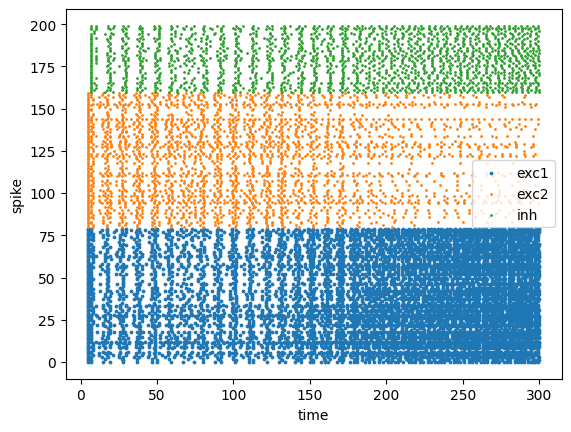

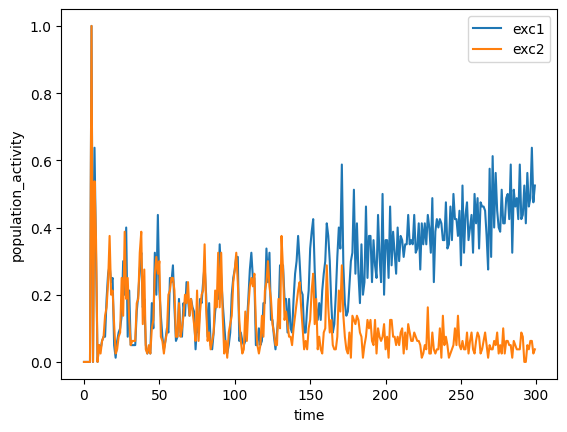

In [9]:
# vars1 = [torch.mean(net["v", 0][i]) for i in range(300)]
# vars2 = [torch.mean(net["v", 1][i]) for i in range(300)]
# vars3 = [torch.mean(net["v", 2][i]) for i in range(300)]
# plt.plot(vars1, label="exc1")
# plt.plot(vars2, label="exc2")
# plt.plot(vars3, label="inh")
# plt.xlabel("time")
# plt.ylabel("v")
# plt.legend()
# plt.show()

# vars1 = [torch.mean(net["I", 0][i]) for i in range(300)]
# vars2 = [torch.mean(net["I", 1][i]) for i in range(300)]
# vars3 = [torch.mean(net["I", 2][i]) for i in range(100)]
# plt.plot(vars1, label="exc1")
# plt.plot(vars2, label="exc2")
# plt.plot(vars3, label="inh")
# plt.xlabel("time")
# plt.ylabel("I")
# plt.legend()
# plt.show()

# plt.plot(net["I", 0][:,:20], label="neuron group 1")
# plt.plot(net["I", 1][:,:20], label="neuron group 2")
# # plt.plot(net["I", 2][:,:1])
# plt.xlabel("time")
# plt.ylabel("I")
# plt.legend()
# plt.show()
# plt.figure(figsize=(10, 7))
plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1], s=3, label="exc1")
x1 = []
for w in net["spike", 1]:
    x1.append(w[1] + 80)
x2 = []
for w in net["spike", 2]:
    x2.append(w[1] + 160)

plt.scatter(net["spike", 1][:,0], x1, s=1, label="exc2")
plt.scatter(net["spike", 2][:,0], x2, s=1, label="inh")
plt.xlabel("time")
plt.ylabel("spike")
plt.legend()
plt.show()

pop_act1 = []
pop_act2 = []
pop_act3 = []
time = []
for t in range(300):
    spikes = torch.sum(net["spike",0][:, 0] == t).item()
    pop_act1.append(spikes/80)
    spikes = torch.sum(net["spike",1][:, 0] == t).item()
    pop_act2.append(spikes/80)
    spikes = torch.sum(net["spike",2][:, 0] == t).item()
    pop_act3.append(spikes/40)
    time.append(t)
# print(pop_act2)
plt.plot(pop_act1[:], label="exc1")
plt.plot(pop_act2[:], label="exc2")
# plt.plot(pop_act3[:], label="inh")
plt.xlabel("time")
plt.ylabel("population_activity")
plt.legend()
plt.show()


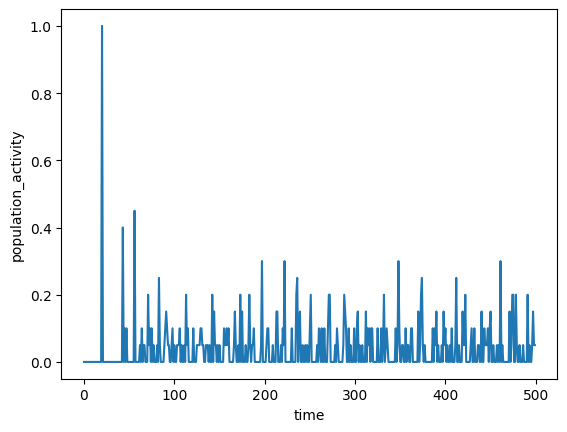

In [16]:
# plt.plot(net["v", 0][:,:20])
# plt.plot(net["v", 1][:,:20])
# plt.xlabel("time")
# plt.ylabel("v")
# plt.show()
# plt.plot(net["I", 0][:,:20])
# plt.plot(net["I", 1][:,:20])
# plt.xlabel("time")
# plt.ylabel("I")
# plt.show()
# plt.figure(figsize=(10, 7))
# plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
# plt.xlabel("time")
# plt.ylabel("spike")
# x = []
# for w in net["spike", 1]:
#     x.append(w[1] + 80)
# plt.scatter(net["spike", 1][:,0], x)
# # plt.scatter(net["spike", 1][:,0], net["spike", 1][:,1])
# plt.show()
# print(torch.sum(net["spike",0][:, 0] == 19).item())
pop_act1 = []
pop_act2 = []
time = []
for t in range(500):
    spikes = torch.sum(net["spike",0][:, 0] == t).item()
    pop_act1.append(spikes/80)
    spikes = torch.sum(net["spike",1][:, 0] == t).item()
    pop_act2.append(spikes/20)
    time.append(t)

plt.plot(pop_act2[:])
plt.xlabel("time")
plt.ylabel("population_activity")
plt.show()
